In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.preprocessing import PowerTransformer

# Load the dataset
wine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')

# Display basic info
print("Dataset Info:")
wine.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [20]:
# Display first few rows
print("\nFirst 5 Rows:")
print(wine.head())


First 5 Rows:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2    

In [21]:
# Summary statistics
print("\nSummary Statistics:")
print(wine.describe())


Summary Statistics:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000         

In [22]:
# Checking for missing values
print("\nMissing Values:")
print(wine.isnull().sum())


Missing Values:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


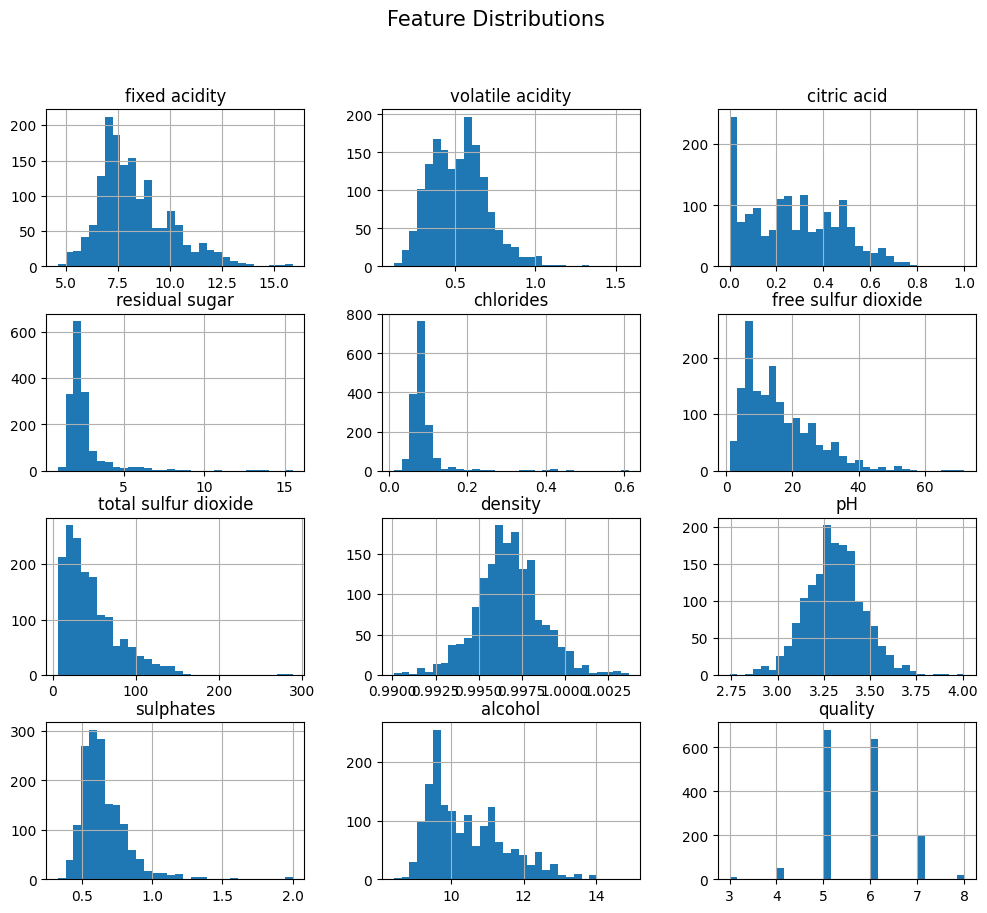

In [23]:
# Distribution of each feature
wine.hist(bins=30, figsize=(12, 10))
plt.suptitle("Feature Distributions", fontsize=15)
plt.show()

In [24]:
# Checking skewness of features
skewness = wine.apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nFeature Skewness:")
print(skewness)


Feature Skewness:
chlorides               5.675017
residual sugar          4.536395
sulphates               2.426393
total sulfur dioxide    1.514109
free sulfur dioxide     1.249394
fixed acidity           0.981829
alcohol                 0.860021
volatile acidity        0.670962
citric acid             0.318039
quality                 0.217597
pH                      0.193502
density                 0.071221
dtype: float64


In [25]:
# Applying transformation to highly skewed features
skewed_features = skewness[abs(skewness) > 0.5].index

# Using power transformation (Box-Cox for positive values, Yeo-Johnson otherwise)
power_transformer = PowerTransformer(method='yeo-johnson')
wine[skewed_features] = power_transformer.fit_transform(wine[skewed_features])

# Rechecking skewness after transformation
new_skewness = wine[skewed_features].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nNew Skewness After Transformation:")
print(new_skewness)


New Skewness After Transformation:
alcohol                 0.112266
sulphates               0.009976
volatile acidity        0.003096
fixed acidity           0.002526
total sulfur dioxide   -0.003749
free sulfur dioxide    -0.009939
residual sugar         -0.015700
chlorides              -0.151162
dtype: float64


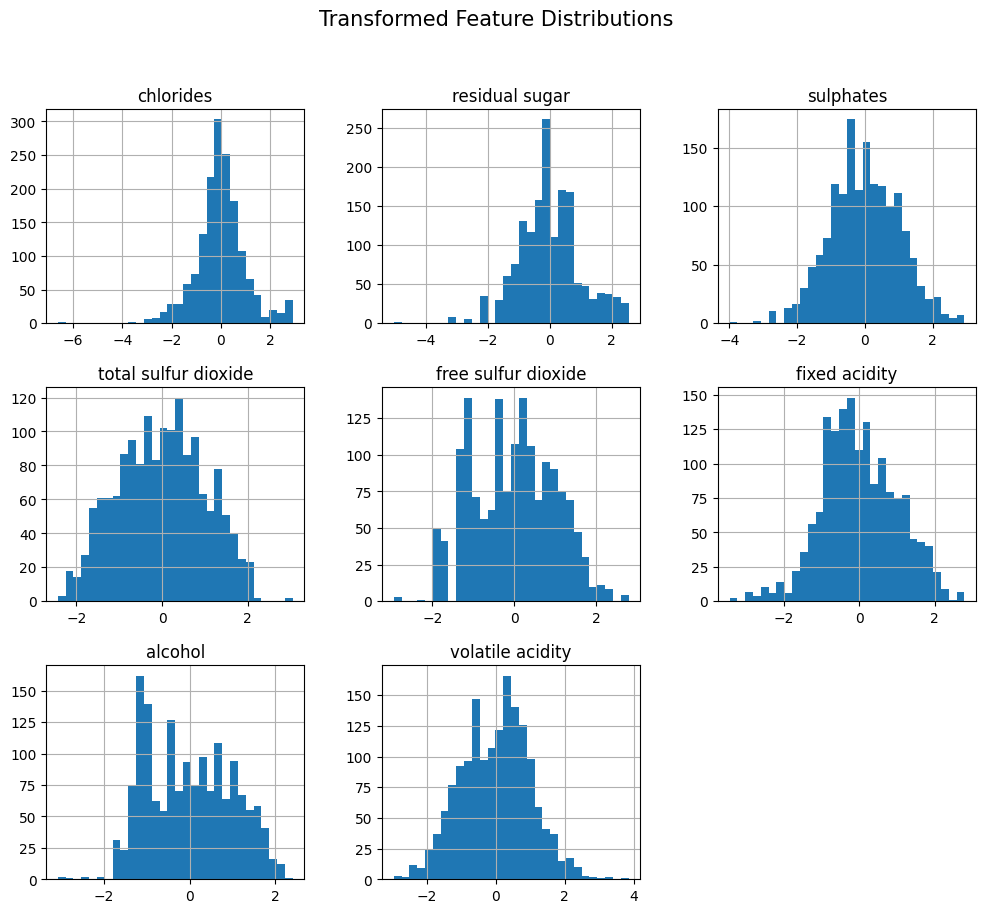

In [26]:
# Visualizing the transformed distributions
wine[skewed_features].hist(bins=30, figsize=(12, 10))
plt.suptitle("Transformed Feature Distributions", fontsize=15)
plt.show()


Q1-Feature Importance:
fixed acidity: Contributes to the tartness and structure of wine.
volatile acidity: Higher levels may lead to an unpleasant vinegar-like taste.
citric acid: Adds freshness and stability to the wine.
residual sugar: Influences sweetness and fermentation.
chlorides: Excessive chlorides can give a salty taste.
free sulfur dioxide: Acts as a preservative to prevent spoilage.
total sulfur dioxide: High levels can cause sensory irritation.
density: Correlates with alcohol and sugar content.
pH: Affects the wine's stability and taste.
sulphates: Enhances flavor and preservation.
alcohol: Higher alcohol content usually improves perceived quality.
quality: Target variable indicating the overall wine quality.

Q2-Missing Data Handling:
No missing values detected in the dataset.
Common imputation techniques include mean, median, and mode imputation. Advanced methods include KNN and MICE.

Q3-Key Factors Affecting Student Performance:
Study time
Parental education
Past grad

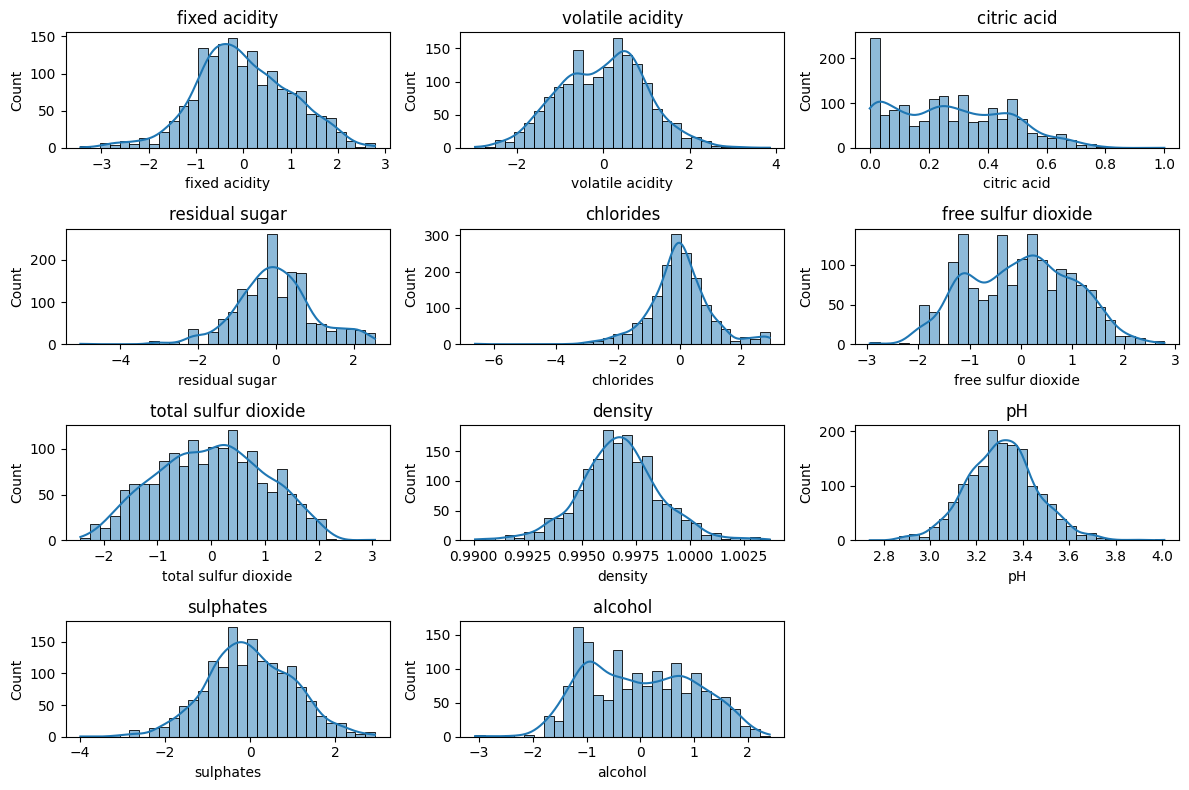

c:\Users\tejpa\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


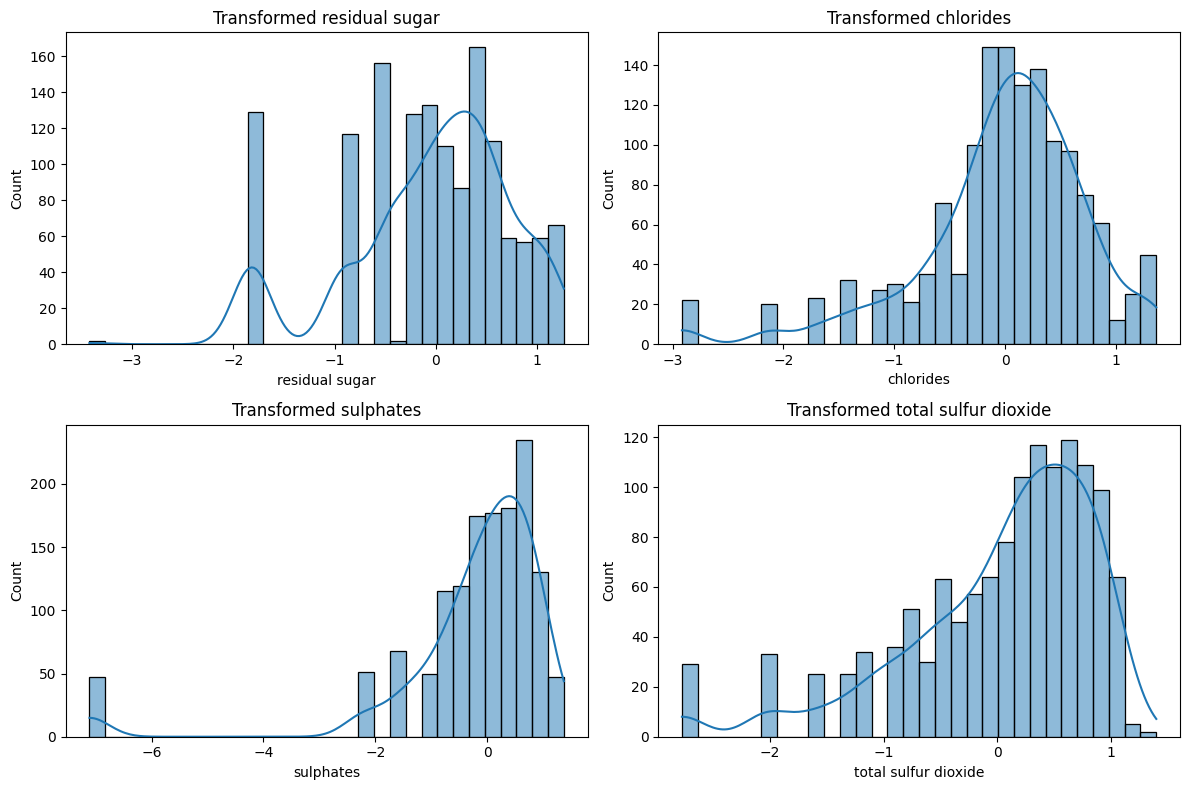

Transformations applied to non-normal features: Log transformation was used to reduce skewness in selected features.


In [27]:
# Q1: Key Features and Importance
key_features = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol", "quality"]
feature_importance = {
    "fixed acidity": "Contributes to the tartness and structure of wine.",
    "volatile acidity": "Higher levels may lead to an unpleasant vinegar-like taste.",
    "citric acid": "Adds freshness and stability to the wine.",
    "residual sugar": "Influences sweetness and fermentation.",
    "chlorides": "Excessive chlorides can give a salty taste.",
    "free sulfur dioxide": "Acts as a preservative to prevent spoilage.",
    "total sulfur dioxide": "High levels can cause sensory irritation.",
    "density": "Correlates with alcohol and sugar content.",
    "pH": "Affects the wine's stability and taste.",
    "sulphates": "Enhances flavor and preservation.",
    "alcohol": "Higher alcohol content usually improves perceived quality.",
    "quality": "Target variable indicating the overall wine quality."
}
print("\nQ1-Feature Importance:")
for feature, importance in feature_importance.items():
    print(f"{feature}: {importance}")

# Q2: Handling Missing Data
print("\nQ2-Missing Data Handling:")
print("No missing values detected in the dataset.")
print("Common imputation techniques include mean, median, and mode imputation. Advanced methods include KNN and MICE.")

# Q3: Key Factors Affecting Student Performance
print("\nQ3-Key Factors Affecting Student Performance:")
student_factors = ["Study time", "Parental education", "Past grades", "School support", "Extracurricular activities", "Socioeconomic status"]
for factor in student_factors:
    print(factor)
print("Statistical techniques such as regression analysis and correlation tests can be used to analyze these factors.")

# Q4: Feature Engineering for Student Performance Dataset
print("\nQ4-Feature Engineering for Student Performance Dataset:")
print("Feature selection involves identifying key academic and non-academic factors. Transformations may include standardization, binning, and interaction features.")

# Q5: Exploratory Data Analysis and Transformations for Non-Normal Features
print("\nQ5-Exploratory Data Analysis for Wine Quality Dataset:")
print("Identifying non-normal features and applying transformations.")

# Visualizing distributions before transformation
plt.figure(figsize=(12, 8))
for i, col in enumerate(wine.columns[:-1], 1):  # Excluding quality (target variable)
    plt.subplot(4, 3, i)
    sns.histplot(wine[col], bins=30, kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

# Applying Log Transformation where necessary
non_normal_features = ["residual sugar", "chlorides", "sulphates", "total sulfur dioxide"]
wine[non_normal_features] = wine[non_normal_features].apply(lambda x: np.log1p(x))

# Visualizing distributions after transformation
plt.figure(figsize=(12, 8))
for i, col in enumerate(non_normal_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(wine[col], bins=30, kde=True)
    plt.title(f"Transformed {col}")
plt.tight_layout()
plt.show()

print("Transformations applied to non-normal features: Log transformation was used to reduce skewness in selected features.")
